In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:

main_model = tf.keras.models.load_model('/content/drive/MyDrive/Models/resnet50_organ_model.h5')

lung_model = tf.keras.models.load_model('/content/drive/MyDrive/Models/lung_best_model8.h5')
brain_model = tf.keras.models.load_model('/content/drive/MyDrive/Models/mri_best_model.h5')
blood_model = tf.keras.models.load_model('/content/drive/MyDrive/Models/bloodcells_BEST_model.h5', compile=False)
skin_model = tf.keras.models.load_model('/content/drive/MyDrive/Models/skin_cancer_final.h5')


blood_model.compile(tf.keras.optimizers.Adamax(learning_rate=0.001),
                    loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
main_classes = ['bloodcell', 'brain', 'lung', 'skin']

lung_classes = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
brain_classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
blood_classes = ['Basophil', 'Eosinophil', 'Erythroblast', 'Monocyte', 'Neutrophil', 'Platelet']
skin_classes = ['Benign', 'Malignant']


In [ ]:
def show_image(img_path, title):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()


In [ ]:
def preprocess_for_model(img_path, model_type):
    if model_type == 'main':
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array

    elif model_type in ['lung']:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array

    elif model_type in ['skin']:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array

    elif model_type == 'brain':
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return img_array

    elif model_type == 'blood':
        img = Image.open(img_path).resize((224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        return img_array


In [ ]:

def predict_image(img_path):
    # Step 1: Predict organ/type
    img_main = preprocess_for_model(img_path, 'main')
    organ_pred = main_model.predict(img_main)
    organ_index = np.argmax(organ_pred)
    organ = main_classes[organ_index]
    organ_conf = np.max(organ_pred) * 100

    print(f" Detected Organ: {organ} ({organ_conf:.2f}%)")
    show_image(img_path, f"Detected: {organ}")

    # Step 2: Forward to the correct specialized model
    if organ == 'lung':
        img = preprocess_for_model(img_path, 'lung')
        pred = lung_model.predict(img)
        label = lung_classes[np.argmax(pred)]
        conf = np.max(pred) * 100
        print("Prediction is done using MODEL 1")

    elif organ == 'brain':
        img = preprocess_for_model(img_path, 'brain')
        pred = brain_model.predict(img)
        label = brain_classes[np.argmax(pred)]
        conf = np.max(pred) * 100
        print("Prediction is done using MODEL 2")

    elif organ == 'bloodcell':
        img = preprocess_for_model(img_path, 'blood')
        pred = blood_model.predict(img)
        label = blood_classes[np.argmax(pred)]
        conf = np.max(pred) * 100
        print("Prediction is done using MODEL 3")

    elif organ == 'skin':
        img = preprocess_for_model(img_path, 'skin')
        pred = skin_model.predict(img)
        label = skin_classes[1] if pred > 0.5 else skin_classes[0]
        conf = float(np.max(pred) * 100)
        print("Prediction is done using MODEL 4")

    else:
        print(" Unknown category predicted by main model.")
        return

    print(f"Predicted Class: {label}")
    print(f"Confidence: {conf:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 Detected Organ: lung (99.96%)


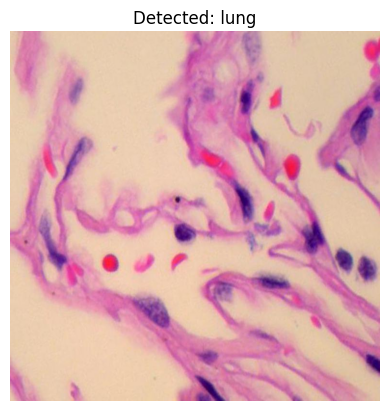

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction is done using MODEL 1
Predicted Class: benign
Confidence: 100.00%


In [ ]:

test_image = "/content/drive/MyDrive/Models/sampleimage1l.jpeg"
predict_image(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 Detected Organ: skin (99.99%)


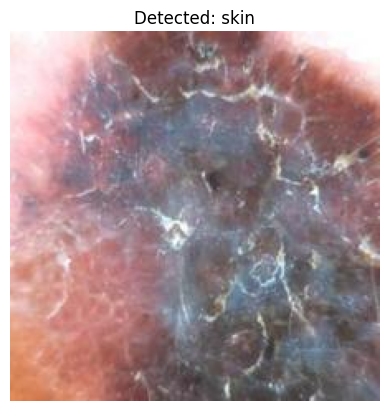

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
Prediction is done using MODEL 4
Predicted Class: Malignant
Confidence: 92.50%


In [ ]:

test_image = "/content/drive/MyDrive/Models/sampleimage2sm.jpg"
predict_image(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
 Detected Organ: skin (100.00%)


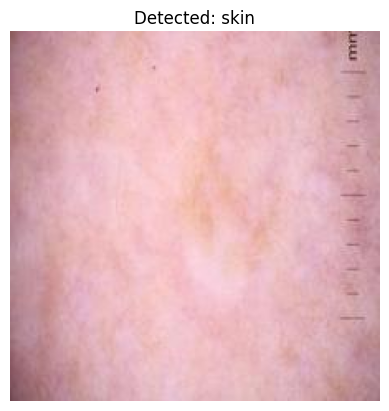

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction is done using MODEL 4
Predicted Class: Benign
Confidence: 1.94%


In [ ]:

test_image = "/content/drive/MyDrive/Models/Sample Image3sb.jpg"
predict_image(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
 Detected Organ: brain (100.00%)


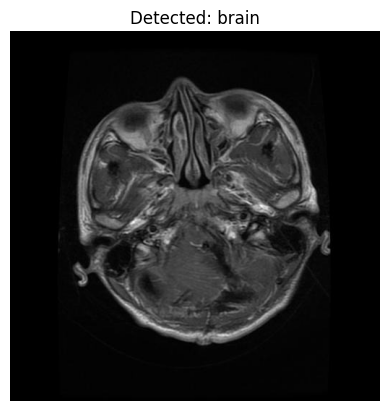

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
Prediction is done using MODEL 2
Predicted Class: glioma
Confidence: 98.05%


In [ ]:

test_image = "/content/drive/MyDrive/Models/sampleimage4bg.jpg"
predict_image(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
 Detected Organ: brain (100.00%)


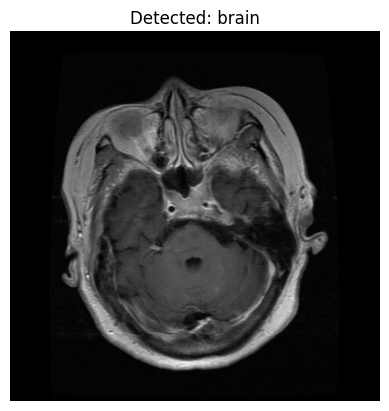

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction is done using MODEL 2
Predicted Class: pituitary
Confidence: 81.65%


In [ ]:
test_image = "/content/drive/MyDrive/Models/sampleimage5bp.jpg"
predict_image(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
 Detected Organ: bloodcell (100.00%)


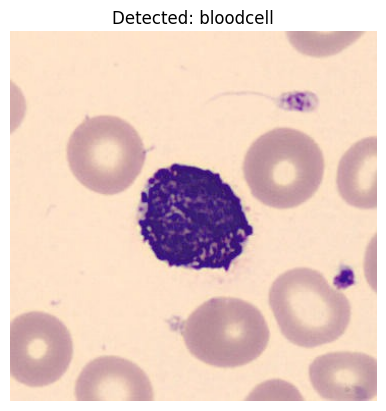

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
Prediction is done using MODEL 3
Predicted Class: Basophil
Confidence: 39.23%


In [ ]:
test_image = '/content/drive/MyDrive/Models/sampleimage6bc.jpg'
predict_image(test_image)